### Explainability Analysis

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import shap
import pickle as pkl

plt.figure(figsize=(10,8))
sns.set(style='darkgrid')

<Figure size 1000x800 with 0 Axes>

In [2]:
data = pd.read_csv('../data/new_data.csv')

X,y = data.drop('Estado al egreso', axis = 1), data['Estado al egreso']

In [3]:
with open('../models/new_rf.pkl', 'rb') as file:
    best_rf = pkl.load(file)

For model interpretability, we performed SHAP (SHapley Additive exPlanations) analysis on the optimized Random Forest model trained with the 5 key features. Specifically, we used TreeExplainer, the SHAP implementation optimized for tree-based models.

In [4]:
explainer = shap.TreeExplainer(best_rf, X)
shap_values = explainer(X)

#### Patient-Specific SHAP Explanation

The first patient (actual outcome: survived) was analyzed using SHAP's waterfall plot.

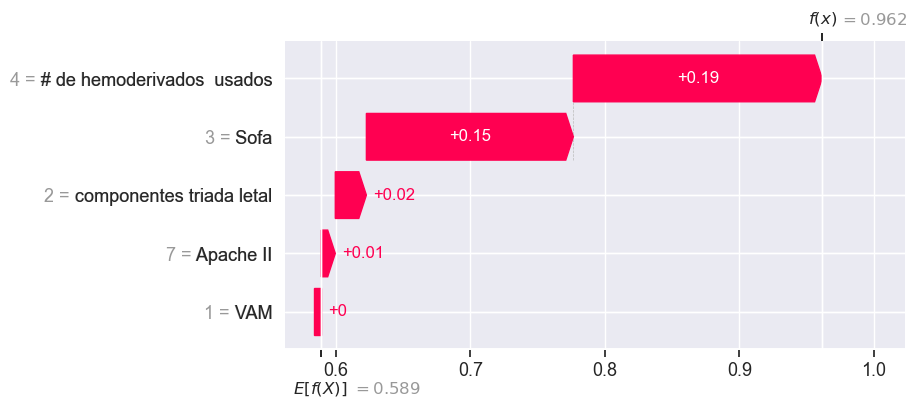

In [5]:
shap.plots.waterfall(shap_values[0, :, 0])

- Base probability (E[f(X)]): 58.9%

- Final prediction (f(x)): 96.2% survival probability


The model started from a baseline survival rate (58.9%) and increased the probability to 96.2% based on this patient's favorable clinical markers. The 37.3% probability increase resulted from protective factors in the 5 key features, ultimately aligning with the real-world outcome.

The second patient (actual outcome: deceased) was analyzed using SHAP's waterfall plot too.

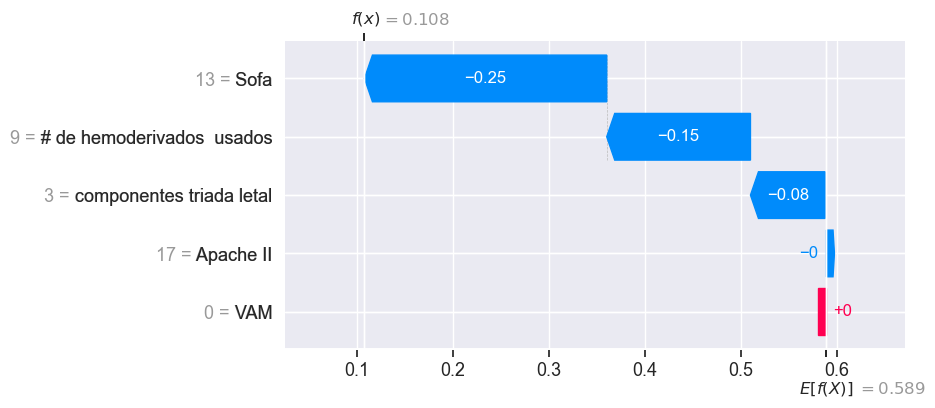

In [6]:
shap.plots.waterfall(shap_values[1, :, 0])

The model correctly predicted a 10% survival probability, consistent with the real-world outcome.


#### Global Feature Impact Analysis

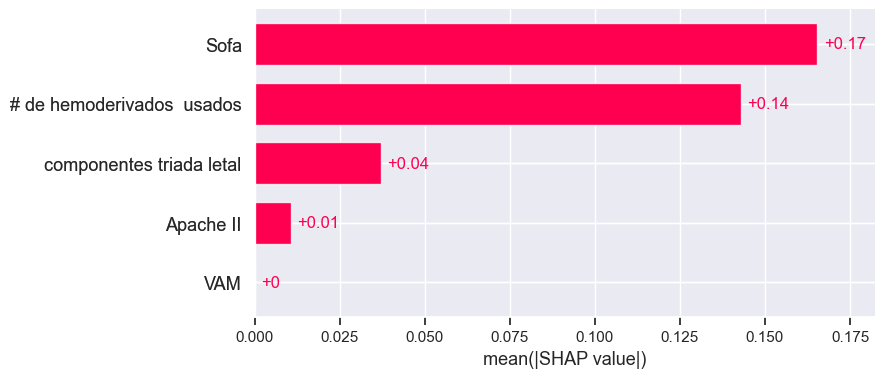

In [7]:
shap.plots.bar(shap_values[:,:,0])

### Key Findings:

**SOFA Score:**

- Highest mean |SHAP value| (≈0.17)

- Dominant predictor of survival outcomes

- Consistent with clinical knowledge - organ failure scores critically impact prognosis

**Hemoderivatives:**

- Second highest impact (≈0.14)

- Significant secondary factor - transfusion needs indicate critical hemodynamic instability

**Triada Letal Components:**

- Moderate contribution (≈0.04)

- Moderate impact - presence of lethal triad elements contributes to risk stratification

**Apache II:**

- Lower impact (≈0.01)

- Minimal influence - general severity score overshadowed by specific clinical markers

**VAM:**

- Least influential (≈0.00)

- Negligible contribution - ventilation metrics showed no measurable impact in this model


VAM's lower ranking suggests ventilation parameters may be situationally important but not universally decisive

This global view confirms our feature selection strategy prioritized variables with the greatest overall predictive power for survival outcomes.

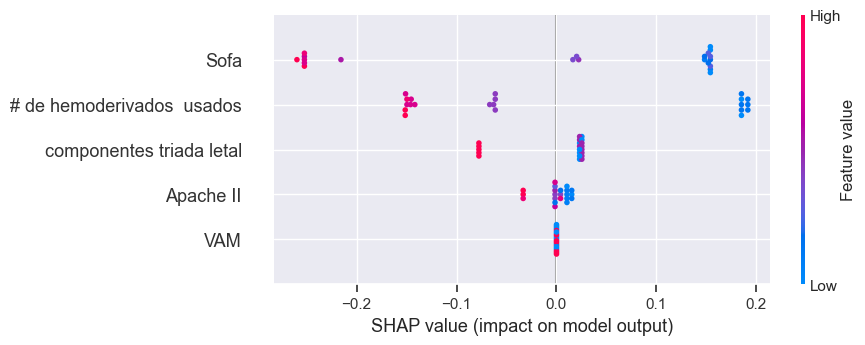

In [8]:
shap.plots.beeswarm(shap_values[:,:,0])